In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
songs_metadata = pd.read_csv("./song_data.csv")
songs_metadata.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [4]:
triplets = pd.read_csv("./10000.txt", sep="\t")
triplets.columns = ["user_id", "song_id", "listen_count"]
triplets.head()

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5


In [5]:
fraction = 0.4
cnt = int(len(songs_metadata) * fraction)

songs_metadata = songs_metadata[:cnt]
triplets = triplets[:cnt]

In [6]:
df = pd.merge(triplets, songs_metadata, on="song_id")
df.sort_values("listen_count", ascending=False, inplace=True)
df.head()

,user_id,song_id,listen_count,title,release,artist_name,year
24871,6040ed6d4e10f09e6cccd64c819c684531abe682,SOTCMDJ12A6D4F8528,436,The Gift,We Don't Need To Whisper,Angels and Airwaves,2006
74936,dc20d1116f083d39d3035e13e266b45d72f9a627,SOWLFNL12AB017DB20,419,Bird Song,Lungs,Florence + The Machine,2009
134986,38767872c514c1b43bab5c7b213b6702980d87c0,SOVQSQZ12A8C13F960,401,..Come Around,..Come Around,Collie Buddz,0
109164,87254d6c37f86b17ebc685f563ea71dfa1b4966f,SOVIZNF12AF72A710A,372,The Big Gundown,Invaders Must Die Remixes and Bonus Tracks,The Prodigy,2009
115404,e67929831fd4af04ee782d71f85fc9961792244f,SOGSDHY12AB017BF39,353,Working With Homesick,Blues On The South Side,Homesick James,1991


In [7]:
df = df[df['listen_count'] >= 10]
len(df)

9575

<AxesSubplot:xlabel='listen_count', ylabel='count'>

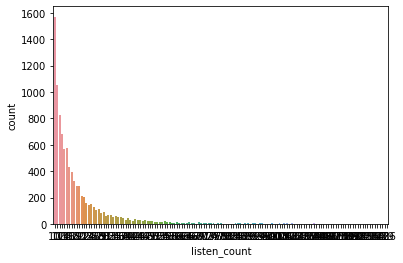

In [8]:
sns.countplot(x='listen_count', data=df)

In [9]:
df["listen_count"] = (df["listen_count"]-df["listen_count"].min())/(df["listen_count"].max()-df["listen_count"].min())

In [10]:
df.head()

,user_id,song_id,listen_count,title,release,artist_name,year
24871,6040ed6d4e10f09e6cccd64c819c684531abe682,SOTCMDJ12A6D4F8528,1.000000,The Gift,We Don't Need To Whisper,Angels and Airwaves,2006
74936,dc20d1116f083d39d3035e13e266b45d72f9a627,SOWLFNL12AB017DB20,0.960094,Bird Song,Lungs,Florence + The Machine,2009
134986,38767872c514c1b43bab5c7b213b6702980d87c0,SOVQSQZ12A8C13F960,0.917840,..Come Around,..Come Around,Collie Buddz,0
109164,87254d6c37f86b17ebc685f563ea71dfa1b4966f,SOVIZNF12AF72A710A,0.849765,The Big Gundown,Invaders Must Die Remixes and Bonus Tracks,The Prodigy,2009
115404,e67929831fd4af04ee782d71f85fc9961792244f,SOGSDHY12AB017BF39,0.805164,Working With Homesick,Blues On The South Side,Homesick James,1991


In [64]:
ratings = pd.DataFrame(df.groupby('title').mean()['listen_count'])
ratings["number of ratings"] = df.groupby('title').count()['listen_count']
ratings.head()

,listen_count,number of ratings
title,,
#40,0.011502,10
(I Got That) Boom Boom,0.004695,1
(I've Had) The Time Of My Life,0.037559,1
(You Drive Me) Crazy (The Stop Remix!),0.000000,1
..Come Around,0.084146,13


In [71]:
mp = df.set_index('title')["artist_name"].T.to_dict()
mp

{'The Gift': 'Angels and Airwaves',
 'Bird Song': 'Florence + The Machine',
 '..Come Around': 'Collie Buddz',
 'The Big Gundown': 'The Prodigy',
 'Working With Homesick': 'Homesick James',
 'The Good Fight': 'Dashboard Confessional',
 "Reelin' In The Years": 'Steely Dan',
 'Mala Vida': 'Mano Negra',
 'Représente': 'Alliance Ethnik',
 'Undo': 'Björk',
 'Harder Better Faster Stronger': 'Daft Punk',
 'Without Me': 'Eminem',
 'How It Feels To Fly': 'Alicia Keys',
 'Unite (2009 Digital Remaster)': 'Beastie Boys',
 'Golden Mummy Golden Bird': 'Horse The Band',
 "Reason I'm Alive (Explicit)": 'Drowning Pool',
 'Leave The Pieces (Album Version)': 'The Wreckers',
 'Otherside (Album Version)': 'Red Hot Chili Peppers',
 'Phenomenon': 'Thousand Foot Krutch',
 'Opposite Of Adults': 'Chiddy Bang',
 'Sincerité Et Jalousie': 'Alliance Ethnik',
 "The Zookeeper's Boy": 'Mew',
 'Rejection Role': 'Soilwork',
 'Wot': 'Captain Sensible',
 'Party In The U.S.A.': 'Miley Cyrus',
 'Just Dance': "Lady GaGa / Col

In [56]:
newR.head()
# ratings = newR

,listen_count,number of ratings,artist_name
title,,,
#40,0.011502,10,10.0
(I Got That) Boom Boom,0.004695,1,1.0
(I've Had) The Time Of My Life,0.037559,1,1.0
(You Drive Me) Crazy (The Stop Remix!),0.000000,1,1.0
..Come Around,0.084146,13,13.0


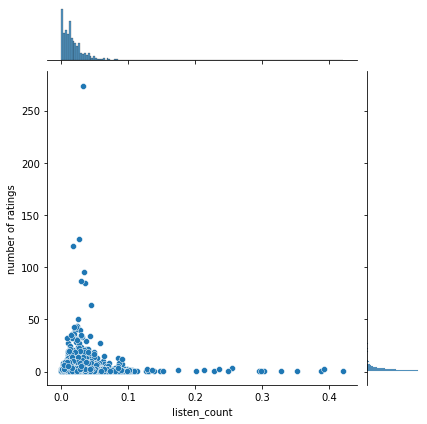

In [12]:
sns.jointplot(x='listen_count', y = 'number of ratings', data=ratings)

In [13]:
# songs_with_less_nor = ratings[ratings["number of ratings"] <= 1]
# print(len(songs_with_less_nor), len(ratings))
# to_remove = list(songs_with_less_nor.index)
# new_ratings = ratings[~ratings.index.isin(to_remove)]
# new_df = df[~df["title"].isin(to_remove)]
# print(len(new_ratings), len(df), len(new_df))
# ratings.sort_values("number of ratings", ascending=True)

In [14]:
# df = new_df
# ratings = new_ratings

In [15]:
songs_mat = df.pivot_table(index="user_id", columns="title", values="listen_count")

In [124]:
def recommend(song_title):
    song_ratings = songs_mat[song_title]
    similar = songs_mat.corrwith(song_ratings)
    corr_song = pd.DataFrame(similar, columns=["Correlation"])
    corr_song.dropna(inplace=True)
    corr_song = corr_song.join(ratings["number of ratings"])
    predictions = corr_song[corr_song["number of ratings"] > 100].sort_values("Correlation", ascending=False)
    series = pd.Series(mp, index = predictions.index)
    print(series)
    predictions["name"] = series
    predictions.drop('Correlation', axis=1, inplace=True)
    cols =  predictions.columns.tolist()
    predictions = predictions[cols[::-1]]
    return predictions.head()

In [125]:
recommend("Undo")

title
Undo                                               Björk
Canada                                  Five Iron Frenzy
Dog Days Are Over (Radio Edit)    Florence + The Machine
dtype: object


,name,number of ratings
title,,
Undo,Björk,274
Canada,Five Iron Frenzy,127
Dog Days Are Over (Radio Edit),Florence + The Machine,120


In [19]:
ratings.sort_values("number of ratings", ascending=False).head()

,listen_count,number of ratings
title,,
Undo,0.033112,274
Canada,0.026302,127
Dog Days Are Over (Radio Edit),0.017899,120
Représente,0.033828,95
Sincerité Et Jalousie,0.030139,87
